# Análisis Exploratorio de Datos


<div id = "id1" > </div>

## Información del Proyecto

- **Fecha:** 18/11/2025
- **Cliente:** BigMart
- **Analista:** Kevin Andres Usama, Jhon Kevin Berrio, Mariana Cruz, Jhon Maicol Montoya, Luis Sotelo
- **Pregunta de Negocio:** **¿Cómo podemos hallar una forma optima de realizar inventario y pedidos a proveedores, logrando que haya una venta uniforme de todos los productos, y a la vez, que no haya sobre stock?**
- **Bases Consultadas:** BigMartSales.csv

---

---

<div id = "id0" > </div>

## Tabla de Contenido

- [1. Pregunta del Análisis](#id1)
    - [1.1 Introducción](#id2)
    - [1.2 Datos](#id3)
    - [1.3 Objetivos](#id4)
- [2. Carga de Librerías](#id5)
- [3. Carga de Datos](#id6)
- [4. Descriptión y limpieza](#id7)
    - [4.1 Información del dataset cargado](#id8)
    - [4.2 Ajustando los tipos de datos](#id9)
    - [4.3 Tratamiento de Datos duplicados completos](#id10)
    - [4.4 Visualización de datos nulos](#id11)
- [5. Análisis Exploratorio de Datos](#id12)
    - [5.1 Análisis Univariable](#id13)
        - [5.1.1 Análisis Descriptivo del Data profiling](#id14)
        - [5.1.2 Variables Númericas](#id15)
        - [5.1.3 Variables Catagoricas](#id16)
    - [5.2 Análisis Bivariable](#id17)
        - [5.2.1 Númericas vs VariableObj.](#id18)
        - [5.2.2 Categoricas vs %VariableObj](#id19)
- [6. Conclusion Final del Análisis Exploratorio](#id20)
- [7. Procesamiento de Datos para Modelamiento](#id21)
    - [7.1 Tratamiento de datos nulos](#id22)
    - [7.2 Limpieza de datos atípicos](#id23)
    - [7.3 Codificación de variables categóricas](#id24)
    - [7.4 Escalado/normalización de variables](#id25)
    - [7.5 Análisis de Correlaciones](#id26)
    - [7.6 Balanceo de datos](#id27)
- [8. Entrenamiento y evaluación de modelo](#id28)
    - [8.1 Evaluación y Comparativa Final](#id29)
    - [8.2 Pruebas de optimización](#id30)
    - [8.3 Comparación entre valores predichos y valores reales usando Ridge](#id31)
- [9. Conclusión Final del modelo](#id32)

<div id = "id1" > </div>

---

## **1. Pregunta del Análisis**

[Descripción de la pregunta de negocio a responder]

¿Cómo podemos hallar una forma optima de realizar inventario y pedidos a proveedores, logrando que haya una venta uniforme de todos los productos, y a la vez, que no haya sobre stock?




[Regresar a la Tabla de Contenido](#id0)

<div id = "id2" > </div>

### 1.1 Introducción

[Descripción del conjunto de datos en general y el objetivo del análisis exploratorio]

Se entrega el siguiente set de datos de una empresa del sector retail, BigMartSales.csv, el cual es un dataset de ventas de 2013 para 1559 productos en 10 tiendas en diferentes ciudades. Además, se han definido ciertos atributos de cada producto y tienda. Debido a la nueva coyuntura que estamos viviendo COVID-19, han observado que algunos productos que normalmente tenían alta rotación se han estado quedando en el almacén generando un grave problema de sobre stock y quitándoles espacio para otros productos por ende le han encargado al área de analítica de la empresa poder ayudarlos con la manera óptima de realizar el inventario y pedidos a los proveedores pues tienen metas comerciales muy altas en el Q1-2021.



[Regresar a la Tabla de Contenido](#id0)

<div id = "id3" > </div>

### 1.2 Datos

[Descripción del conjunto y tipos de datos]

Item_Identifier: ID de producto único.

Item_Weight: Peso del producto. 

Item_Fat_Content: El producto es bajo en grasa o no?.

Item_Visibility: El% del área de visualización total de todos los productos en una tienda asignada a un producto en particular. 
 
Item_Type: La categoría a la que pertenece el producto. 

Item_MRP: Precio minorista máximo (precio de lista) del producto. 

Outlet_Identifier: ID de tienda única.

Outlet_Establishment_Year: El año en que se estableció la tienda.

Outlet_Size: El tamaño de la tienda en términos de superficie cubierta 

Outlet_Location_Type: El tipo de ciudad en la que se encuentra la tienda.

Outlet_Type: Si la tienda es solo una tienda de comestibles o algún tipo de supermercado 

  




[Regresar a la Tabla de Contenido](#id0)

<div id = "id4" > </div>

### 1.3 Objetivos

El proyecto se centrará en los siguientes objetivos clave, cada uno alineado con una pregunta específica que abordaremos:

**Análisis Exploratorio de Datos (EDA):**

- Realizar un análisis detallado para entender las características fundamentales del conjunto de datos.

**Conclusiones del Diagnostico:**

- Generar insight claves para la solución de la pregunta de negocio.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id6" > </div>

---

## **2. Carga de Librerías**

[Aquí se incluye el código para importar las librerías necesarias]

In [1]:
#importamos las librerias necesarias para el proceso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#EDA
from ydata_profiling import ProfileReport

#Modelamiento
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

#Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_rows", None)  # sin límite de filas

[Regresar a la Tabla de Contenido](#id0)

<div id = "id6" > </div>

---

## **3. Carga de Datos**

[Aquí se incluye el código para cargar los datos en el entorno de trabajo]

In [2]:
data = pd.read_csv('BigMartSales.csv')  # Cargar el dataset

In [3]:
data.head()  # Mostrar las primeras filas del dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


[Regresar a la Tabla de Contenido](#id0)

<div id = "id7" > </div>

---

### **4. Descripción y limpieza**

<div id = "id8" > </div>

### 4.1 Información de datasets cargados

[Aquí se incluye el código para ver la informacion de los datos cargados]


In [4]:
data.shape

(8523, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


[Regresar a la Tabla de Contenido](#id0)

<div id = "id9" > </div>

### 4.2 Ajustando los tipos de datos

[Aquí se incluye el código para ver al tipo de dato correcto]

Organizamos las categorias en el campo Item_Fat_Content para que sean solo 2 tipos, "Low Fat" y "Regular"

In [6]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.strip().replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular','Low Fat':'Low Fat'})
display(data['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Convertimos los tipos de datos en las variables "object" a "category"

In [7]:
data = data.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.7 KB


[Regresar a la Tabla de Contenido](#id0)

<div id = "id10" > </div>

### 4.3 Identificación de Datos duplicados completos

[Aquí se incluye el código y los pasos para identificar los datos duplicados]

No hay datos duplicados

In [9]:
duplicados = data.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [10]:
data[duplicados]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [11]:
data_clean = data.drop_duplicates().reset_index(drop=True)

In [12]:
data_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


[Regresar a la Tabla de Contenido](#id0)

<div id = "id11" > </div>

### 4.4 Visualización de datos nulos
[Averiguamos que variables del conjunto de datos contiene datos faltantes en terminos de porcentaje]

In [13]:
data_clean.isnull().sum() / len(data_clean) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

[Regresar a la Tabla de Contenido](#id0)

<div id = "id11" > </div>

### 4.5 Eliminación de Variables

No hay variables irrelevantes, ya que podemos utilizar los identificadores para la imputación de valores nulos.

<div id = "id12" > </div>

---

## **5. Análisis Exploratorio de Datos**

<div id = "id13" > </div>

### 5.1 Análisis Univariable

  •    Variables numéricas: estadística descriptiva, histogramas, box plot

  •    Variables categóricas: tabla de frecuencias y diagrama de barras

<div id = "id14" > </div>

### 5.1.1 *Análisis Descriptivo del Data profiling*

[Hacemos un análisis de cada variable del Dataset]

[Regresar a la Tabla de Contenido](#id0)

In [14]:
profile = ProfileReport(data_clean, title='EDA Profiling Report', minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 1975.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div id = "id15" > </div>

### 5.1.2 *Variables Númericas*

En el analisis univariable de variables númericas, excluimos las columnas identificadoras y la variable target.

In [15]:
# Descripción Estadística
target = "Item_Outlet_Sales"
numerical_cols = data_clean.select_dtypes(include=[np.number]).columns
numerical_cols = numerical_cols.drop(target)
numerical_cols = numerical_cols.drop('Item_Identifier', errors='ignore')
numerical_cols = numerical_cols.drop('Outlet_Identifier', errors='ignore')
print("Numerical columns:", numerical_cols.tolist())
data_clean[numerical_cols].describe()

Numerical columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867
std,4.643456,0.051598,62.275067,8.371760
min,4.555000,0.000000,31.290000,1985.000000
25%,8.773750,0.026989,93.826500,1987.000000
50%,12.600000,0.053931,143.012800,1999.000000
75%,16.850000,0.094585,185.643700,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


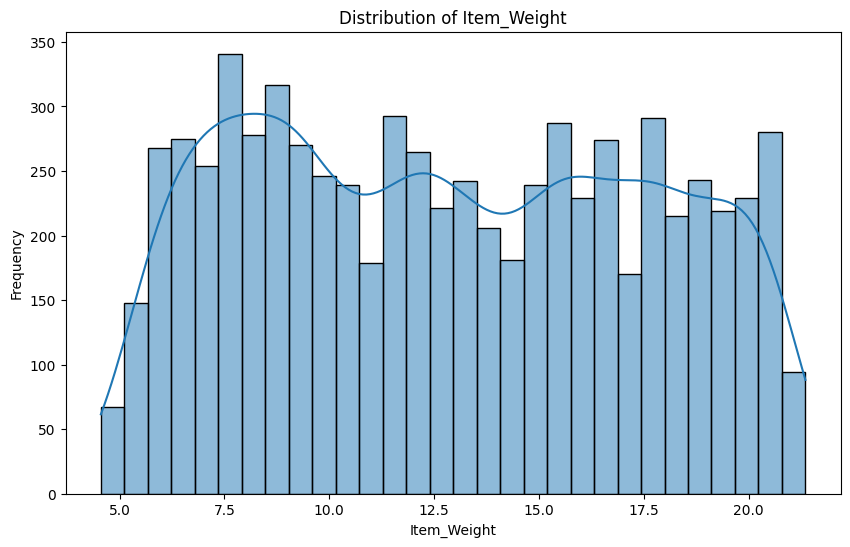

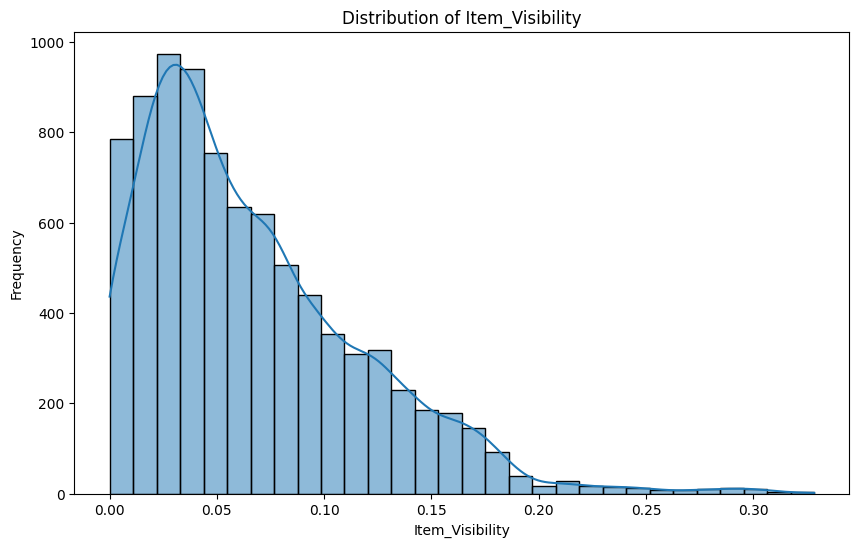

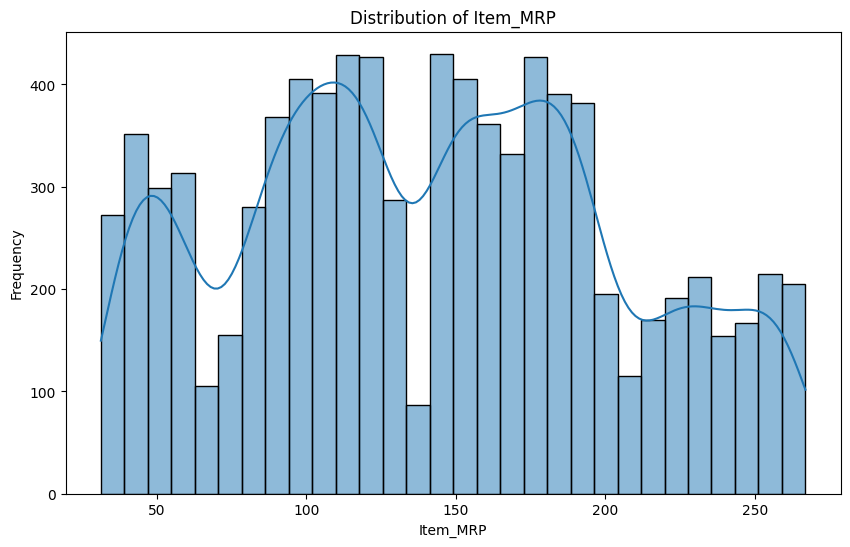

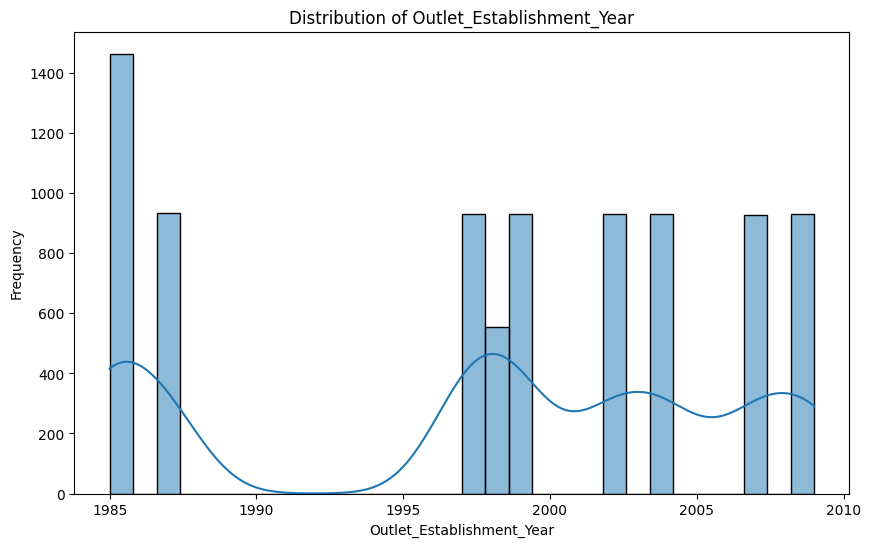

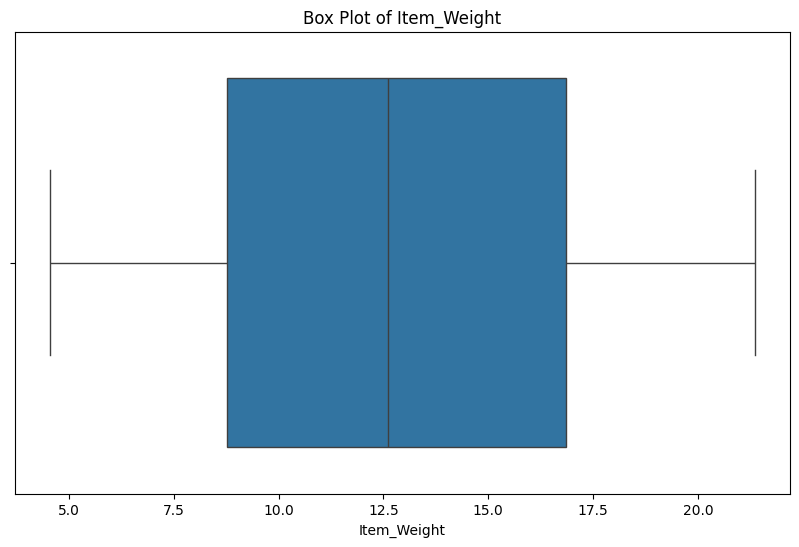

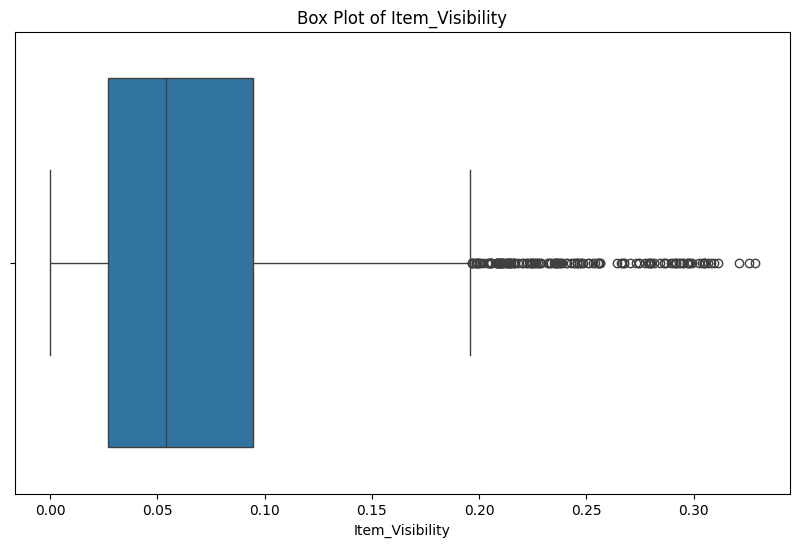

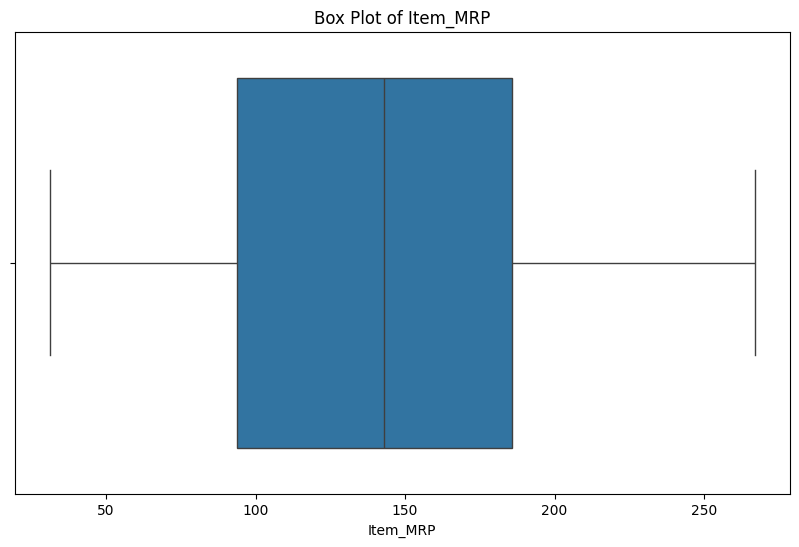

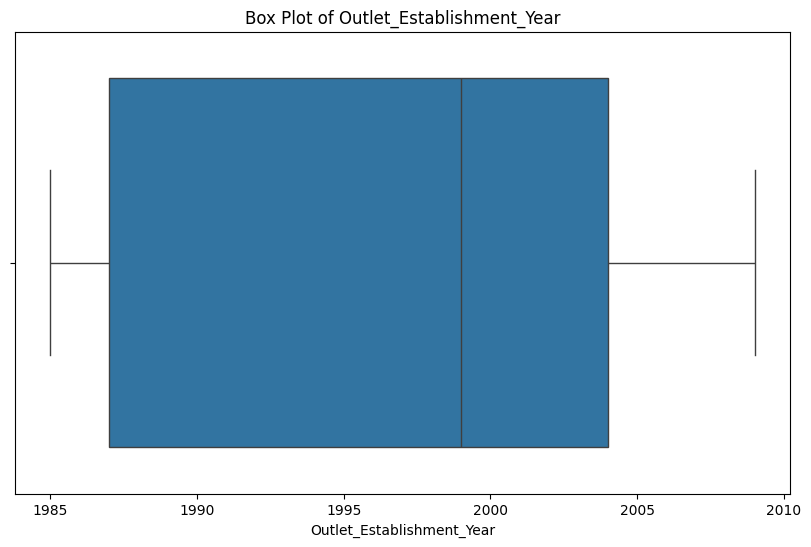

In [16]:
# Histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_clean[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_clean[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

[Regresar a la Tabla de Contenido](#id0)

<div id = "id16" > </div>

### 5.1.3 *Variables Categoricas*

En el analisis univariable de variables categoricas, excluimos las columnas identificadoras

In [17]:
# Identify categorical columns
categorical_cols = data_clean.select_dtypes(include=['category', 'object']).columns
print("Categorical columns:", categorical_cols.tolist())
categorical_cols = categorical_cols.drop('Item_Identifier', errors='ignore')
categorical_cols = categorical_cols.drop('Outlet_Identifier', errors='ignore')
data_clean[categorical_cols].describe()

Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,6113,8523,8523
unique,2,16,3,3,4
top,Low Fat,Fruits and Vegetables,Medium,Tier 3,Supermarket Type1
freq,5517,1232,2793,3350,5577



Top 2 frequency table for Item_Fat_Content (total unique: 2):
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


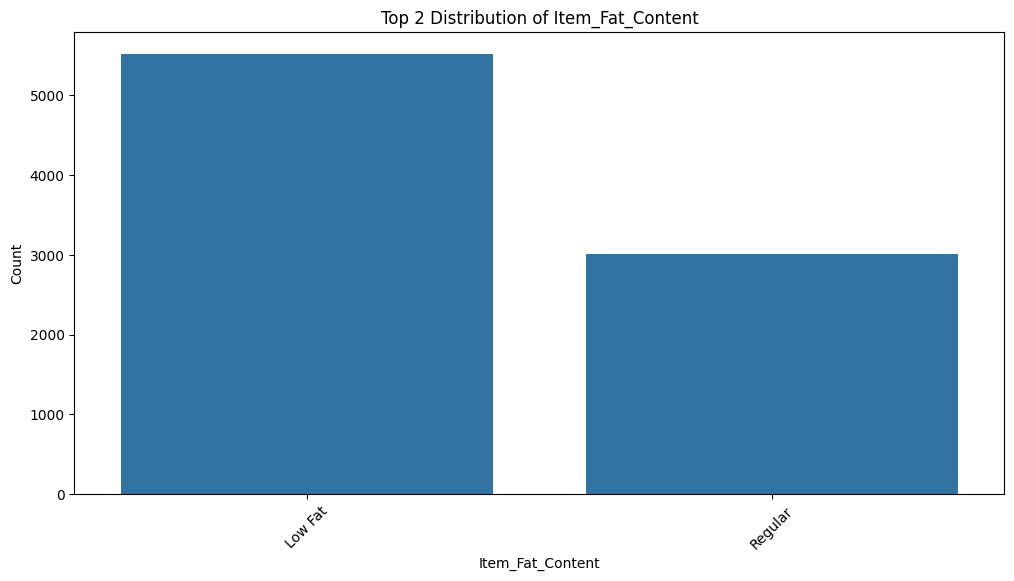


Top 10 frequency table for Item_Type (total unique: 16):
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: count, dtype: int64


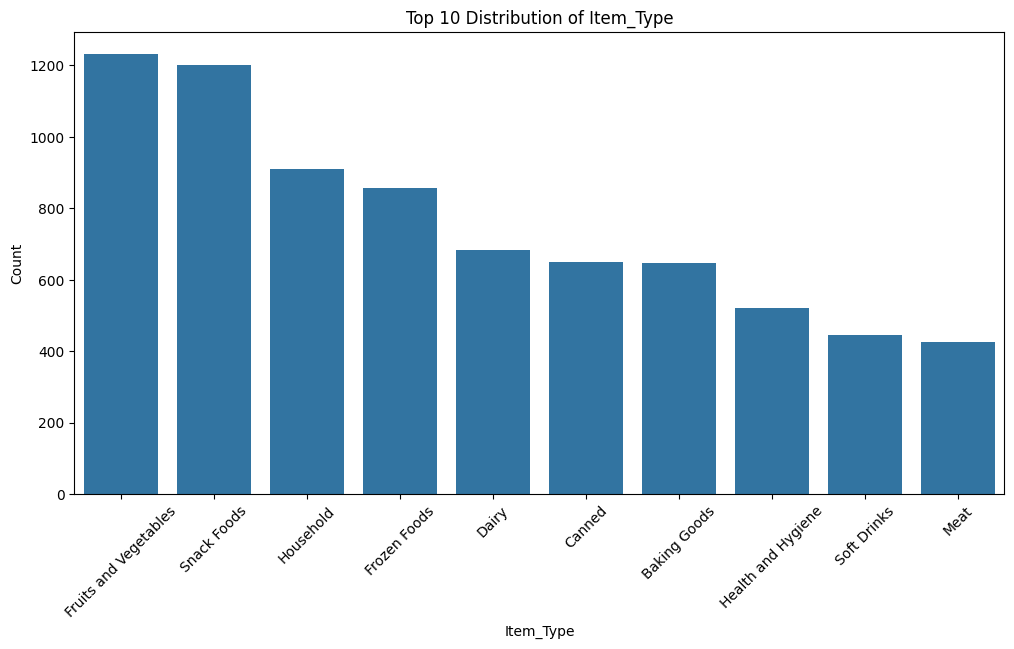


Top 3 frequency table for Outlet_Size (total unique: 3):
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


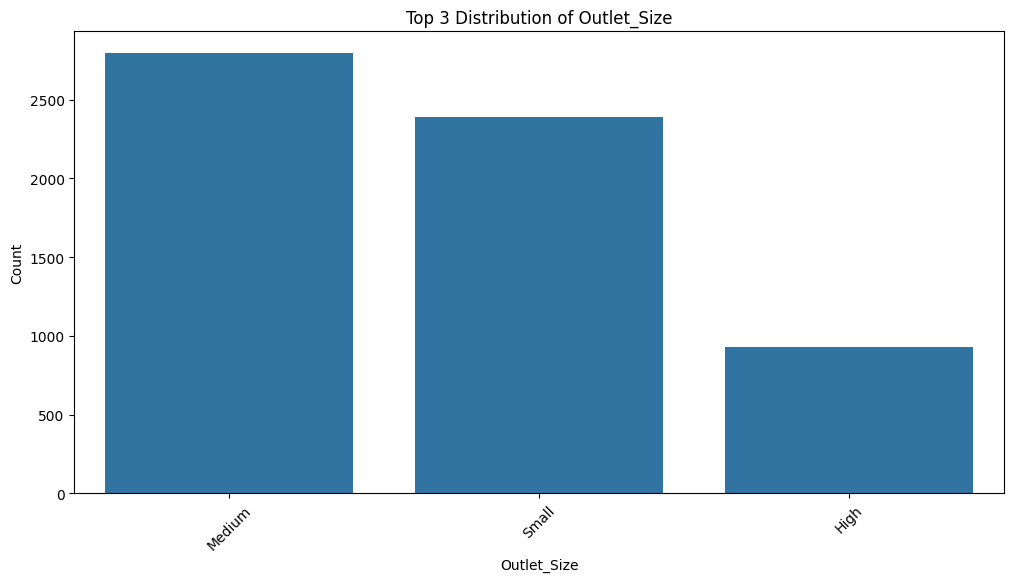


Top 3 frequency table for Outlet_Location_Type (total unique: 3):
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


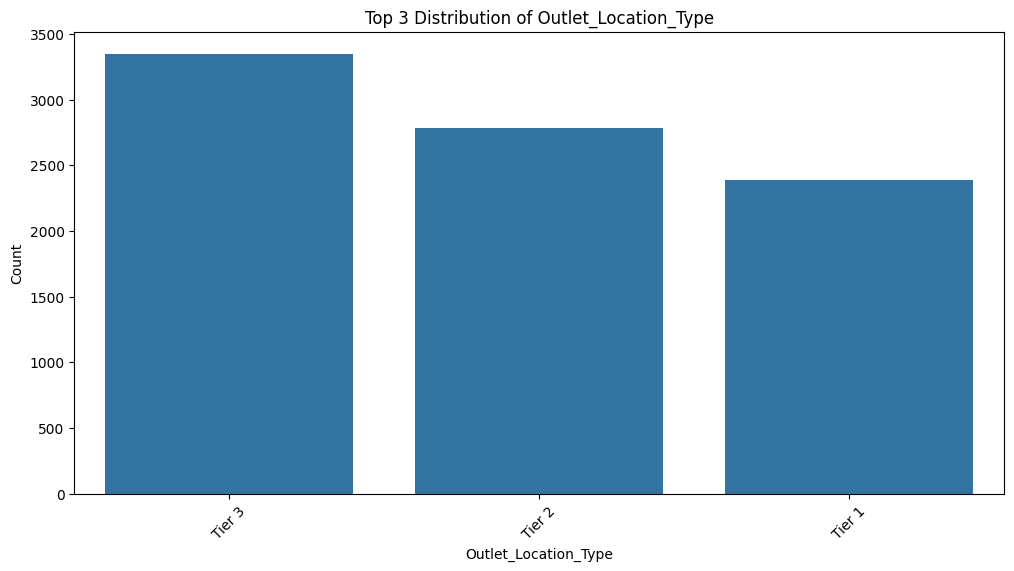


Top 4 frequency table for Outlet_Type (total unique: 4):
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


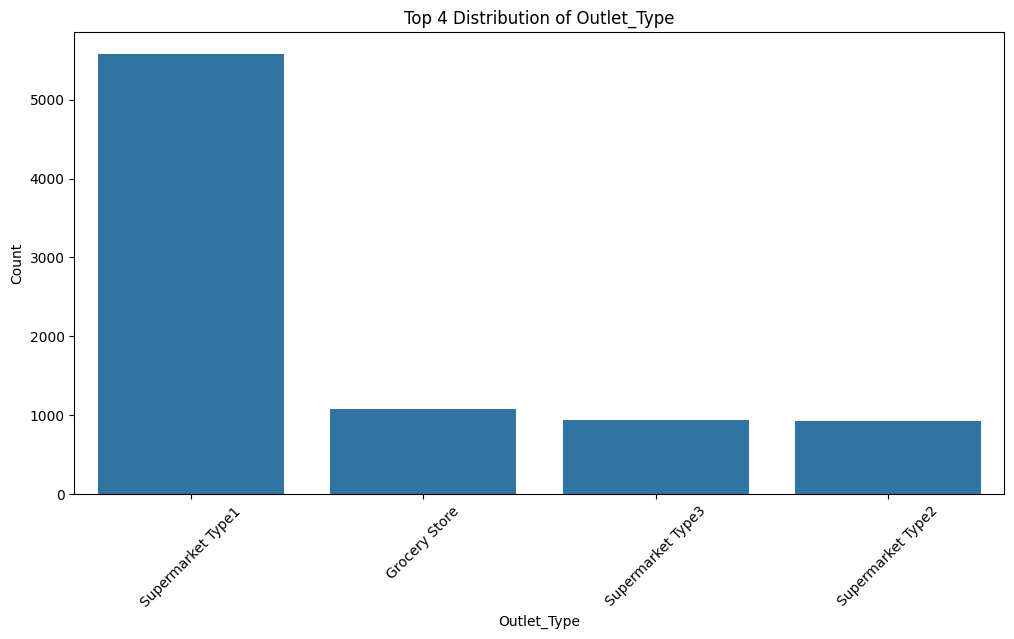

In [18]:
# Frequency tables and bar plots for categorical features
for col in categorical_cols:
    unique_count = data_clean[col].nunique()
    top_n = 10 if unique_count > 10 else unique_count
    
    print(f"\nTop {top_n} frequency table for {col} (total unique: {unique_count}):")
    print(data_clean[col].value_counts().head(top_n))
    
    plt.figure(figsize=(12, 6))
    order = data_clean[col].value_counts().head(top_n).index
    sns.countplot(data=data_clean, x=col, order=order)
    plt.title(f'Top {top_n} Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

[Regresar a la Tabla de Contenido](#id0)

<div id = "id17" > </div>

### 5.2 Análisis Bivariable

  •    Relación entre las variables con la variable objetivo

[Regresar a la Tabla de Contenido](#id0)

<div id = "id18" > </div>

### *5.2.1 Númericas vs Objetivo*

### Scatterplots

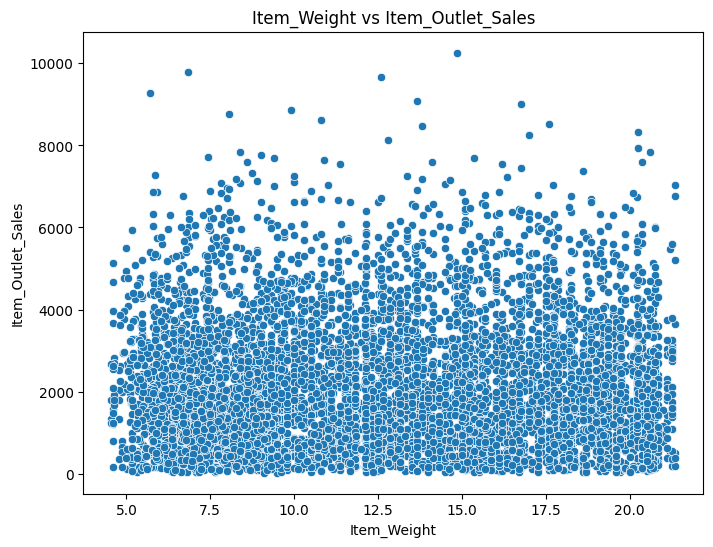

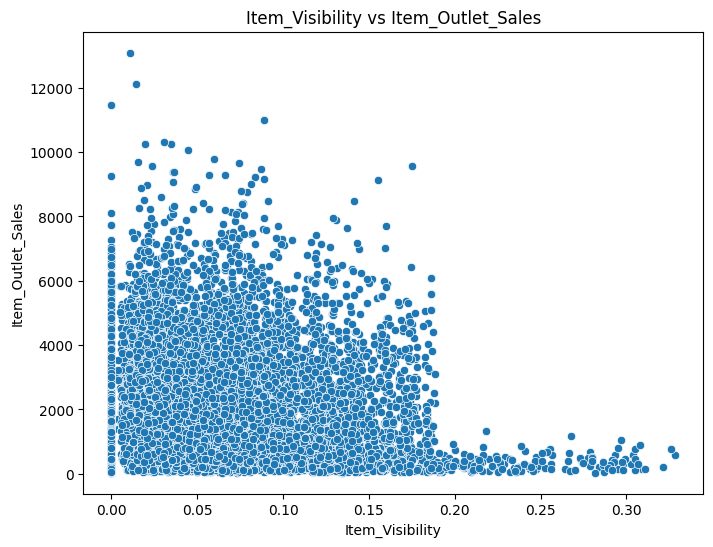

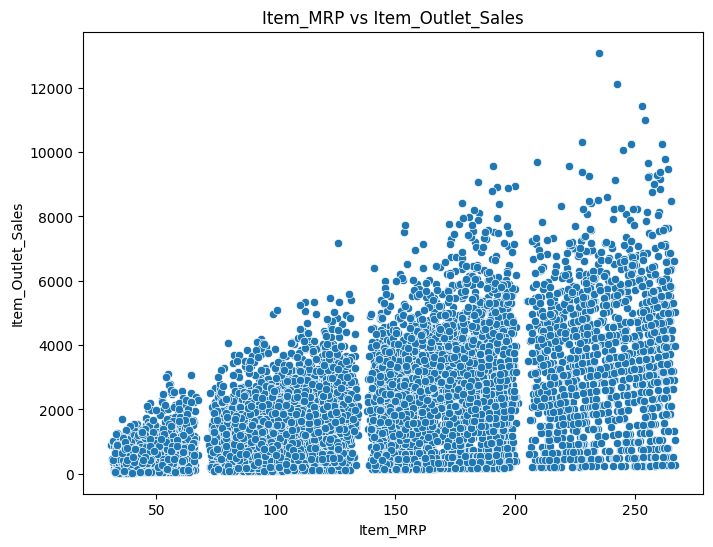

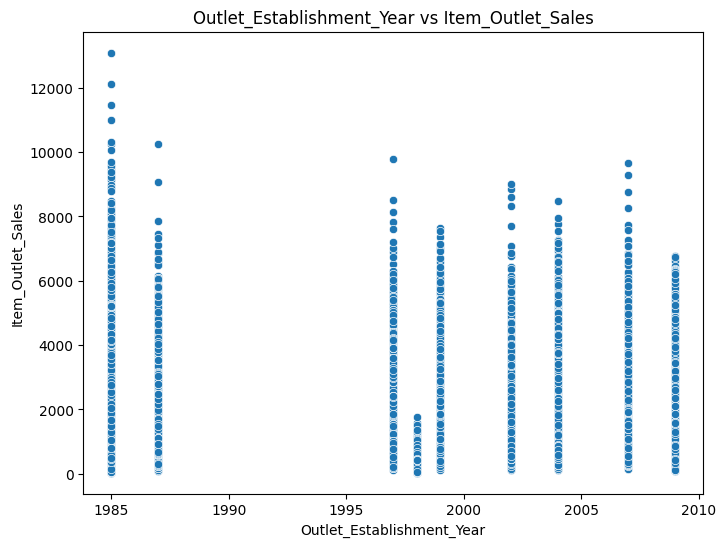

In [19]:
for var in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_clean[var], y=data_clean['Item_Outlet_Sales'])
    plt.title(f'{var} vs Item_Outlet_Sales')
    plt.xlabel(var)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()


[Regresar a la Tabla de Contenido](#id0)

<div id = "id19" > </div>

### *5.2.2 Categoricas vs Objetivo*

### Barplots del promedio de la variable objetivo por categoria

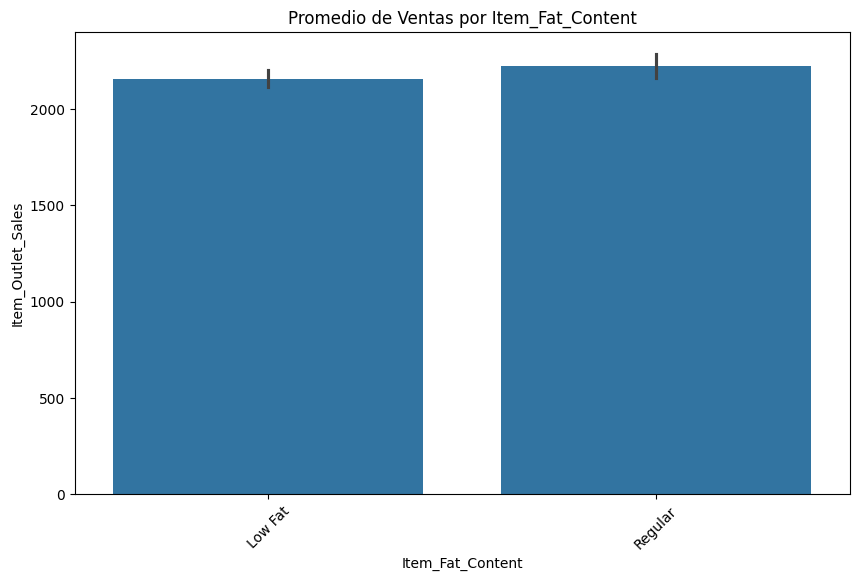

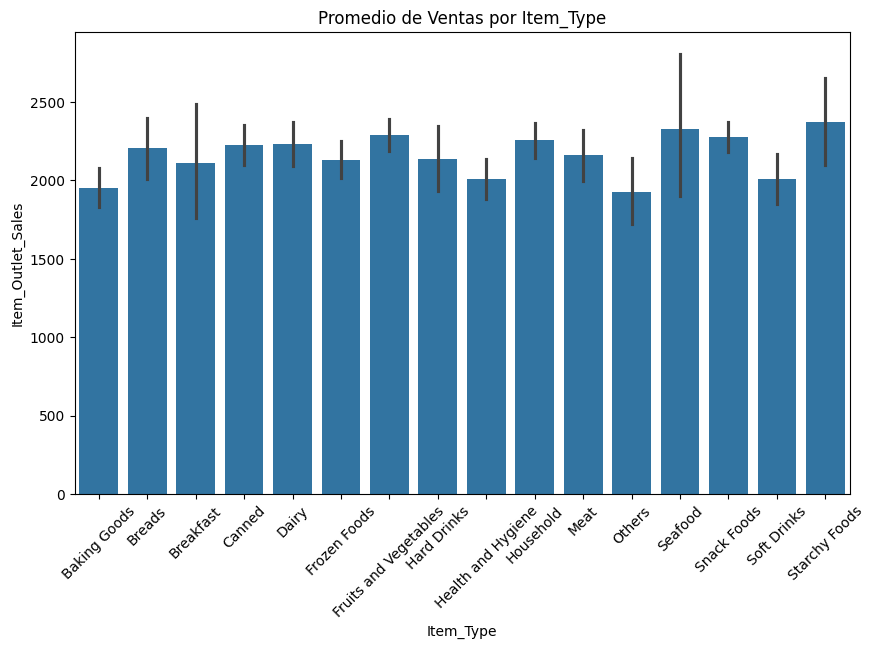

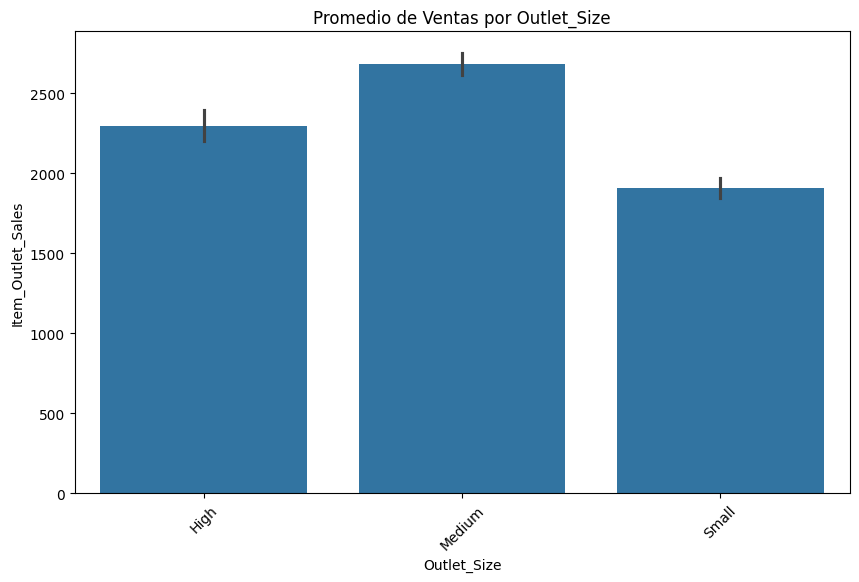

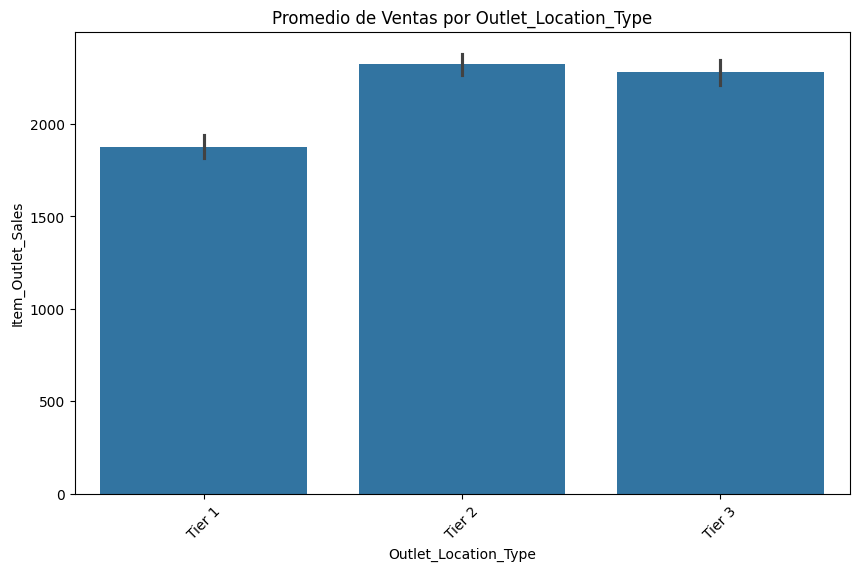

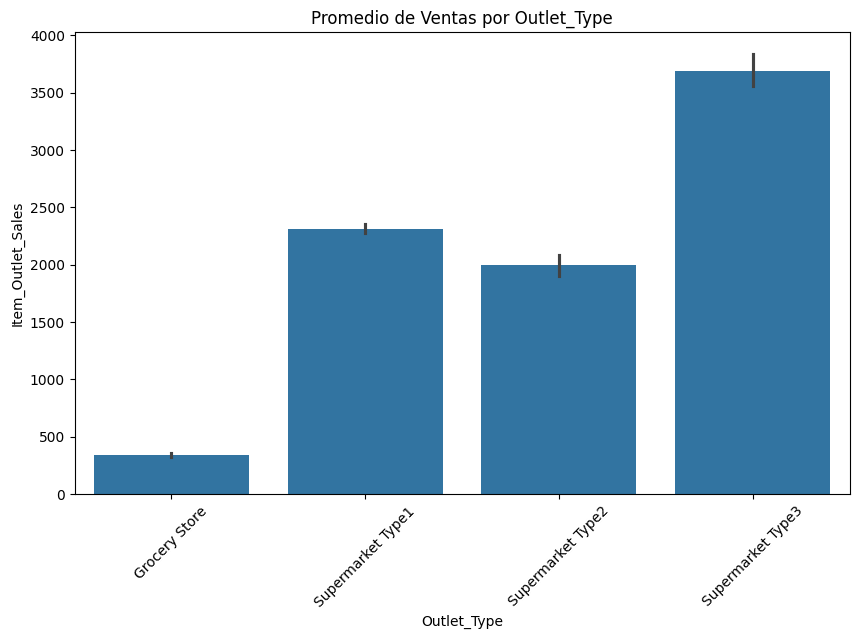

In [20]:
for var in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var, y='Item_Outlet_Sales', data=data_clean, estimator=np.mean)
    plt.title(f'Promedio de Ventas por {var}')
    plt.xticks(rotation=45)
    plt.show()


### Boxplots con la variable objetivo y las categoricas

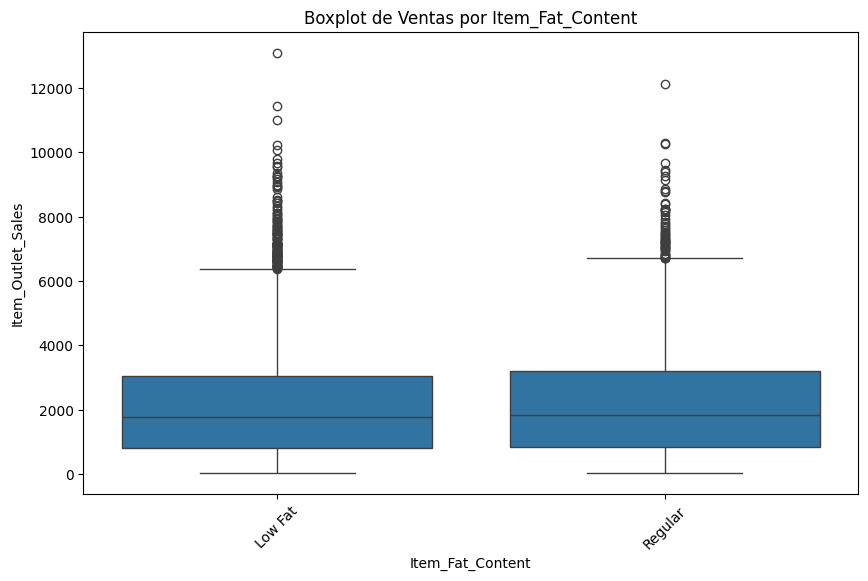

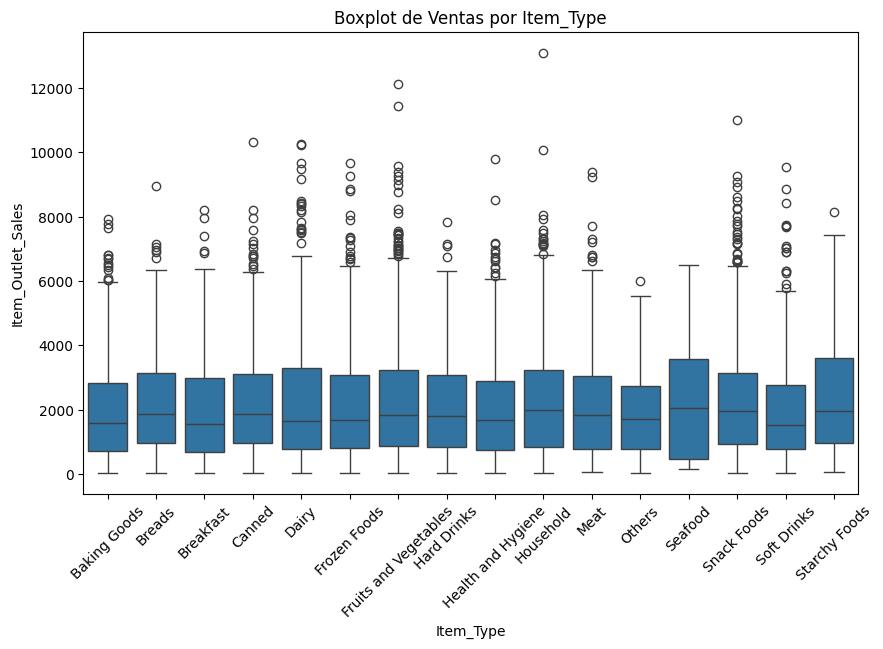

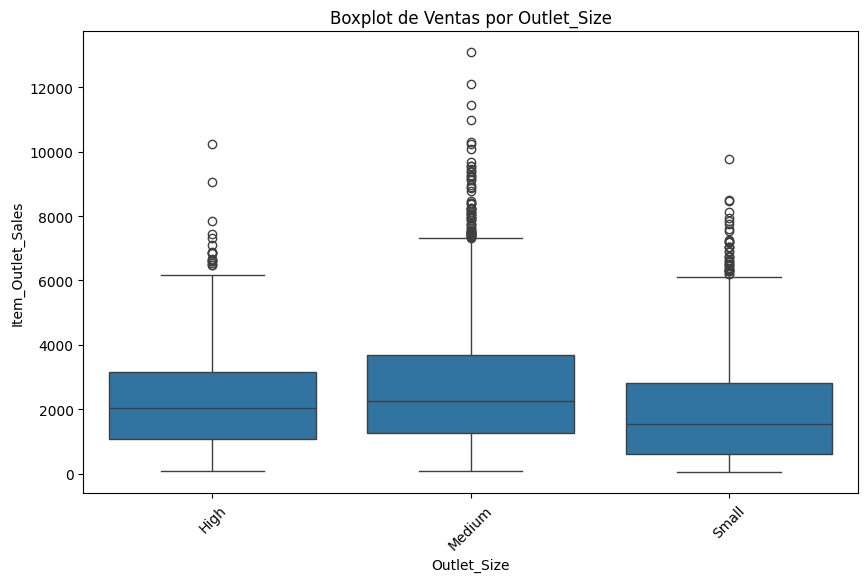

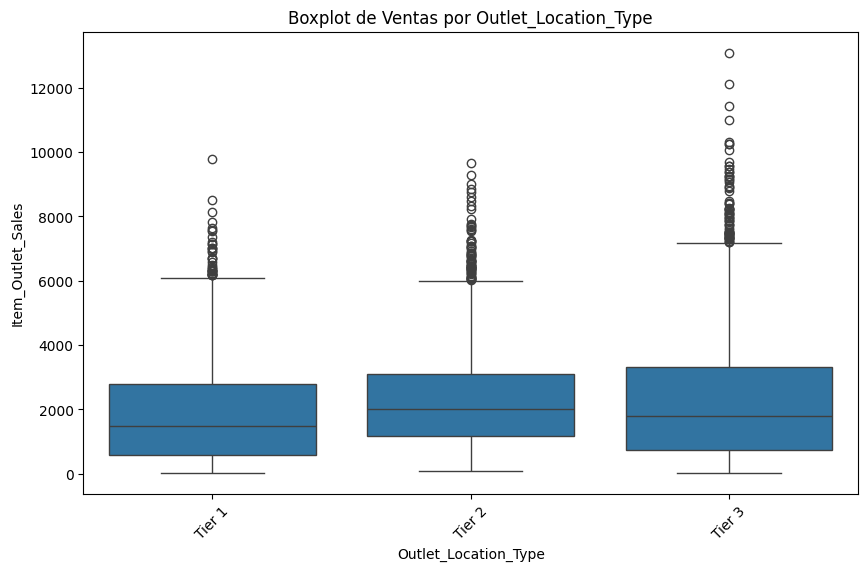

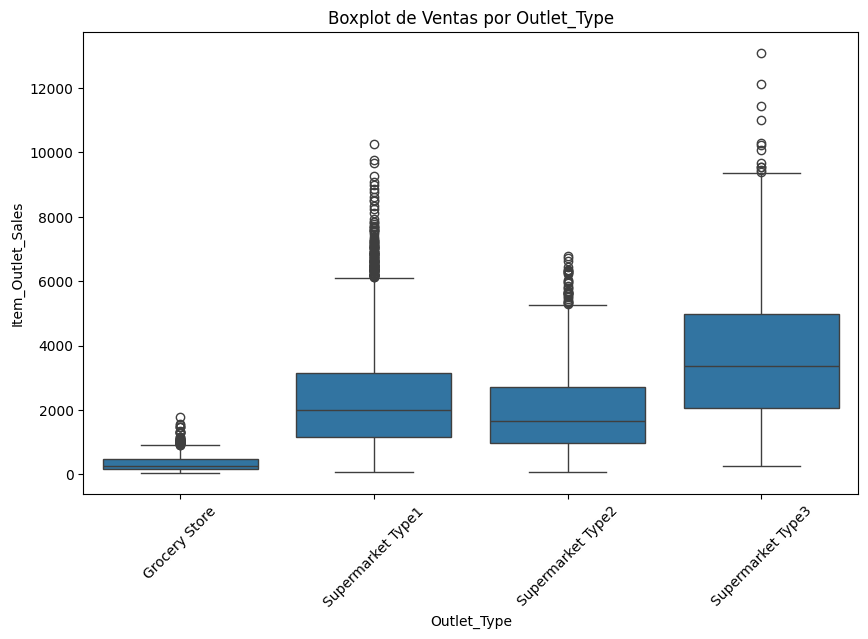

In [21]:
for var in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='Item_Outlet_Sales', data=data_clean)
    plt.title(f'Boxplot de Ventas por {var}')
    plt.xticks(rotation=45)
    plt.show()

[Regresar a la Tabla de Contenido](#id0)

<div id = "id20" > </div>

---

## **6. Conclusiones**

[Conclusiones generales obtenidas del análisis exploratorio de datos]

A partir del analisis exploratorio de datos que se realizó, hemos identificado que Outlet_Type y Outlet_Identifier son los predictores más potentes. Específicamente, las tiendas "Supermarket Type3" (lideradas por OUT027) tienen un muy buen rendimiento de ventas, mientras que las "Grocery Store" (OUT010, OUT019) tienen un rendimiento casi nulo. Esto sugiere que el problema de "sobre stock" mencionado en el caso de estudio probablemente se origina en una estrategia de inventario uniforme que no diferencia entre estos tipos de tienda.

A nivel de producto, el Item_MRP (precio de lista) es el segundo factor más importante, mostrando una clara correlación positiva y una sorprendente agrupación en cuatro bandas de precios. En contraste, variables como Item_Type o Item_Fat_Content no muestran una diferenciación significativa en las ventas. Además, descubrimos una relación contraintuitiva en Item_Visibility, donde una mayor visibilidad no implica mayores ventas, aunque la variable presenta serios problemas de calidad de datos (valores en 0).

Despues de estos analisis, se puede notar una importante cantidad de valores nulos en los campos Item_Weight y Outlet_Size, por lo que, antes del modelamiento, es necesario tratar estos valores, ademas, tambien se observa una cantidad pequeña (Aproximadamente 6%) de valores en 0, en el campo Item_Visibility, este campo representa el porcentaje del area total de exhibicion de la tienda que ocupa ese producto, por lo que podemos asumir que los valores en 0 son incorrectos y deben tratarse para poder evitar inconsistencias al momento de las predicciones

[Regresar a la Tabla de Contenido](#id0)

<div id = "id22" > </div>

---

## **7 Procesamiento Final para Modelamiento**
[Se realizan pasos esenciales como el tratamiento de datos nulos mediante imputación, codificación de variables categóricas con one-hot encoding o label encoding, Normalización de features para uniformidad, detección de outliers, ingeniería de features (creación de nuevas variables si es necesario) y división de datos en conjuntos de entrenamiento y prueba, asegurando que el dataset esté limpio, balanceado y optimizado para mejorar el rendimiento de los algoritmos predictivos.]

[Regresar a la Tabla de Contenido](#id0)

<div id = "id22" > </div>

### *7.1 Tratamiento de datos nulos*
[Tratatmos las variables del conjunto de datos contiene datos faltantes]


In [22]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.7 KB


In [23]:
data_clean.isnull().sum() / len(data_clean) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

*Variables Númericas*

La variable Item_Weight la imputamos con la media por Item_Identifier, ya que asumimos que el peso de un mismo item es similar.

In [24]:
data_clean['Item_Weight'] = data_clean['Item_Weight'].astype(float)
global_mean = data_clean['Item_Weight'].mean()
data_clean['Item_Weight'] = data_clean.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
data_clean['Item_Weight'] = data_clean['Item_Weight'].fillna(global_mean)

Observamos una importante cantidad de valores en 0 en la variable Item_Visibility, lo cual es incorrecto ya que deberia tener un valor mayor a 0, sino no tendría sentido su venta

In [25]:
filas_con_ceros = data_clean[data_clean['Item_Visibility'] == 0]
print("Cantidad de ceros:", len(filas_con_ceros), "Cantidad total:", len(data_clean))

Cantidad de ceros: 526 Cantidad total: 8523


El campo Item_Visibility tiene valores en 0 que deben ser reemplazados por la media del PRODUCTO específico, usamos el Item_Identifier para agrupar y calcular la media por producto

Si queda alguno con NaN, se rellena con la media global

In [26]:
data_clean['Item_Visibility'] = data_clean['Item_Visibility'].astype(float)
data_clean.loc[data_clean['Item_Visibility'] == 0, 'Item_Visibility'] = np.nan
data_clean['Item_Visibility'] = data_clean.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))

data_clean['Item_Visibility'] = data_clean['Item_Visibility'].fillna(data_clean['Item_Visibility'].mean())

*Variableas Categoricas*

In [27]:
data_clean.isnull().sum() / len(data_clean) * 100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [28]:
data_clean.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Imputamos con la moda el campo de Outlet_Size, ya que es una var categorica, ademas, esta imputación se hace basado en el Outlet_Type (Tipo de tienda), ya que los mismos tipos de tienda tienden a tener tamaños similares

In [29]:
data_clean['Outlet_Size'] = data_clean.groupby('Outlet_Type')['Outlet_Size'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

In [30]:
data_clean.isnull().sum() / len(data_clean) * 100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

[Regresar a la Tabla de Contenido](#id0)

<div id = "id23" > </div>

### *7.2 Limpieza de datos atípicos*
[Valores extremos pueden afectar el modelo.]


In [31]:
# Funcion para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [32]:
# Identificación de outliers en variables numericas, excluyendo la variable objetivo y Outlet_Establishment_Year
cols_numericas = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
for col in cols_numericas:
    outliers = detect_outliers_iqr(data_clean, col)
    num_outliers = len(outliers)
    porcentaje = (num_outliers / len(data_clean)) * 100
    
    print(f"{col}: {num_outliers} outliers ({porcentaje:.2f}%)")

    if num_outliers > 0:
        print(f"   Ejemplo de valores: {outliers[col].head(5).tolist()}\n")
    else:
        print("   No hay outliers detectados con IQR.\n")

Item_Weight: 0 outliers (0.00%)
   No hay outliers detectados con IQR.

Item_Visibility: 144 outliers (1.69%)
   Ejemplo de valores: [0.255394896, 0.293417759, 0.278974075, 0.291865402, 0.2047]

Item_MRP: 0 outliers (0.00%)
   No hay outliers detectados con IQR.



Notamos que hay un 1.69% de Outliers en la variable Item_Visibility, es posible que hayan productos que hayan tenido un gran porcentaje de visibilidad, sin embargo, son casos especificos, que es mejor tratarlos para el modelamiento, por lo que utilizamos la tecnica de Capping para tratar los outliers

In [33]:
# Calculamos los límites del IQR para Item_Visibility
Q1 = data_clean['Item_Visibility'].quantile(0.25)
Q3 = data_clean['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"El límite superior calculado es: {upper_bound}")

# Si es mayor al límite, lo reemplazamos por el límite. Si no, se queda igual.
data_clean.loc[data_clean['Item_Visibility'] > upper_bound, 'Item_Visibility'] = upper_bound

El límite superior calculado es: 0.2000746785


[Regresar a la Tabla de Contenido](#id0)

<div id = "id24" > </div>

### *7.3 Codificación de variables categóricas*
[Codificación de variables categóricas con one-hot encoding o label encoding]


Vamos a codificar las variables categoricas de la siguiente forma:

Item_Fat_Content: Binario (Solo hay 2 opciones) {Low Fat: 0, Regular: 1}

Outlet_Size: Ordinal, Existe un orden lógico y creciente en los tamaños. Para que el modelo entienda esta jerarquía, asignamos valores numéricos que respetan el orden. {Small: 0, Medium: 1, High: 2}

Outlet_Location_Type: Ordinal, Los niveles de ciudad ("Tier") indican una escala o clasificación económica/demográfica implícita. Mantenemos ese orden. {Tier 1: 0, Tier 2: 1, Tier 3: 2}

Outlet_Type: No tiene un orden, usamos One-Hot Encoding.

Item_Type: No tiene un orden, usamos One-Hot Encoding.

Item_Identifier es un caso especial, ya que el ID crudo, podemos observar que hay una gran cantidad de estos, sin embargo, podemos notar que las dos primeras letras crean una categoria del producto, {FD: Food o Comida, DR: Drinks o bebidas, NC: No comestibles}. Por lo que, podemos crear esta nueva categoria general de los items y aplicar One-Hot Encoding a estas 3 nuevas categorías resultantes.

No codificamos la variable Outlet_Identifier, para asi en la predicción, poder hacerla unicamente con variables como el tipo de tienda, el tamaño de la tienda, la ubicación de la tienda, para que de esta forma, se pueda hacer tanto con tiendas actuales como futuras.


In [34]:
data_clean.drop('Outlet_Identifier', axis=1, inplace=True)

In [35]:
cols_categoricas = data_clean.select_dtypes(include=['category']).columns

# 2. Recorrerlas e imprimir sus valores únicos
for col in cols_categoricas:
    print(f"Variable: {col}")
    print(f"Cantidad de únicos: {data_clean[col].nunique()}")
    print(data_clean[col].unique())
    print("-" * 30) # Separador visual

Variable: Item_Identifier
Cantidad de únicos: 1559
['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', ..., 'FDD28', 'FDU43', 'NCF55', 'NCW30', 'NCW05']
Length: 1559
Categories (1559, object): ['DRA12', 'DRA24', 'DRA59', 'DRB01', ..., 'NCZ41', 'NCZ42', 'NCZ53', 'NCZ54']
------------------------------
Variable: Item_Fat_Content
Cantidad de únicos: 2
['Low Fat', 'Regular']
Categories (2, object): ['Low Fat', 'Regular']
------------------------------
Variable: Item_Type
Cantidad de únicos: 16
['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']
------------------------------
Variable: Outlet_Size
Cantidad de únicos: 3
['Medium', 'Small', 'High']
Categories (3, object): ['High', 'Medium', 'Small']
------------------------------
Variable: Outlet_Location_Type
Cantidad de

In [36]:
# Categorias derivadas de Item_Identifier

# Extraemos las dos primeras letras del ID (FD, DR, NC)
data_clean['Item_Category_Code'] = data_clean['Item_Identifier'].apply(lambda x: x[:2])

# Opcional: Mapearlo a nombres más claros si quieres ver qué son
data_clean['Item_Category_Code'] = data_clean['Item_Category_Code'].map({
    'FD': 'Food',
    'DR': 'Drinks',
    'NC': 'Non_Consumable'
})
# Eliminamos la columna original que ya no sirve
data_clean = data_clean.drop('Item_Identifier', axis=1)

In [37]:
# Codificación One-Hot

cols_to_one_hot = ['Item_Type', 'Outlet_Type', 'Item_Category_Code']

# Usamos el drop='first' para evitar la multicolinealidad
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_nominal = ohe.fit_transform(data_clean[cols_to_one_hot])
encoded_df = pd.DataFrame(encoded_nominal, columns=ohe.get_feature_names_out(cols_to_one_hot))
data_clean = pd.concat([data_clean, encoded_df], axis=1)
data_clean.drop(columns=cols_to_one_hot, inplace=True)

In [38]:
# Codificación Ordinal, No utilizamos LabelEncoder porque queremos un orden específico

# Tamaño
map_size = {'Small': 0, 'Medium': 1, 'High': 2}
data_clean['Outlet_Size'] = data_clean['Outlet_Size'].map(map_size)

# Ubicación
map_loc = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
data_clean['Outlet_Location_Type'] = data_clean['Outlet_Location_Type'].map(map_loc)

In [39]:
# Binario

# Grasa
map_fat = {'Low Fat': 0, 'Regular': 1}
data_clean['Item_Fat_Content'] = data_clean['Item_Fat_Content'].map(map_fat)

In [40]:
# Verificación Final
print("Tamaño final del dataset:", data_clean.shape)
data_clean.head()

Tamaño final del dataset: (8523, 28)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Code_Food,Item_Category_Code_Non_Consumable
0,9.30,0,0.016047,249.8092,1999,1,0,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5.92,1,0.019278,48.2692,2009,1,2,443.4228,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,17.50,0,0.016760,141.6180,1999,1,0,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,19.20,1,0.022911,182.0950,1998,0,2,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8.93,0,0.016164,53.8614,1987,2,2,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


[Regresar a la Tabla de Contenido](#id0)

<div id = "id25" > </div>

### *7.4 Escalado/normalización de variables*
[Asegura que las variables numéricas estén en la misma escala.]


Antes de hacer normalización de variables, separamos entre la variable objetivo y las predictoras, para poder sacar los datos Train y Test, de esta forma solo normalizamos los datos de ENTRENAMIENTO (X_train), utilizando los parametros (minimos y maximos) aprendidos únicamente de ese conjunto, evitando así la fuga de informacion (Data Leakage)."

In [41]:
# Primero separamos la variable objetivo (Y) de las predictoras (X)
X = data_clean.drop('Item_Outlet_Sales', axis=1)
y = data_clean['Item_Outlet_Sales']

In [42]:
# Dividimos los datos (Train / Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
scale = MinMaxScaler()
# Ajustamos solo con X_train y transformamos X_train
# El scaler aprende min/max solo del entrenamiento
X_train_scaled = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)

In [44]:
# Transformamos X_test (sin hacer fit), usamos los min/max.
# Si en el test hay un valor más grande que el max del train, se saldrá del rango 0-1.
X_test_scaled = pd.DataFrame(scale.transform(X_test), columns=X_test.columns)

[Regresar a la Tabla de Contenido](#id0)

<div id = "id26" > </div>

### *7.5 Análisis de Correlaciones*
[Vemos la relación entre variables y el target para seleccionar variables para modelamiento]

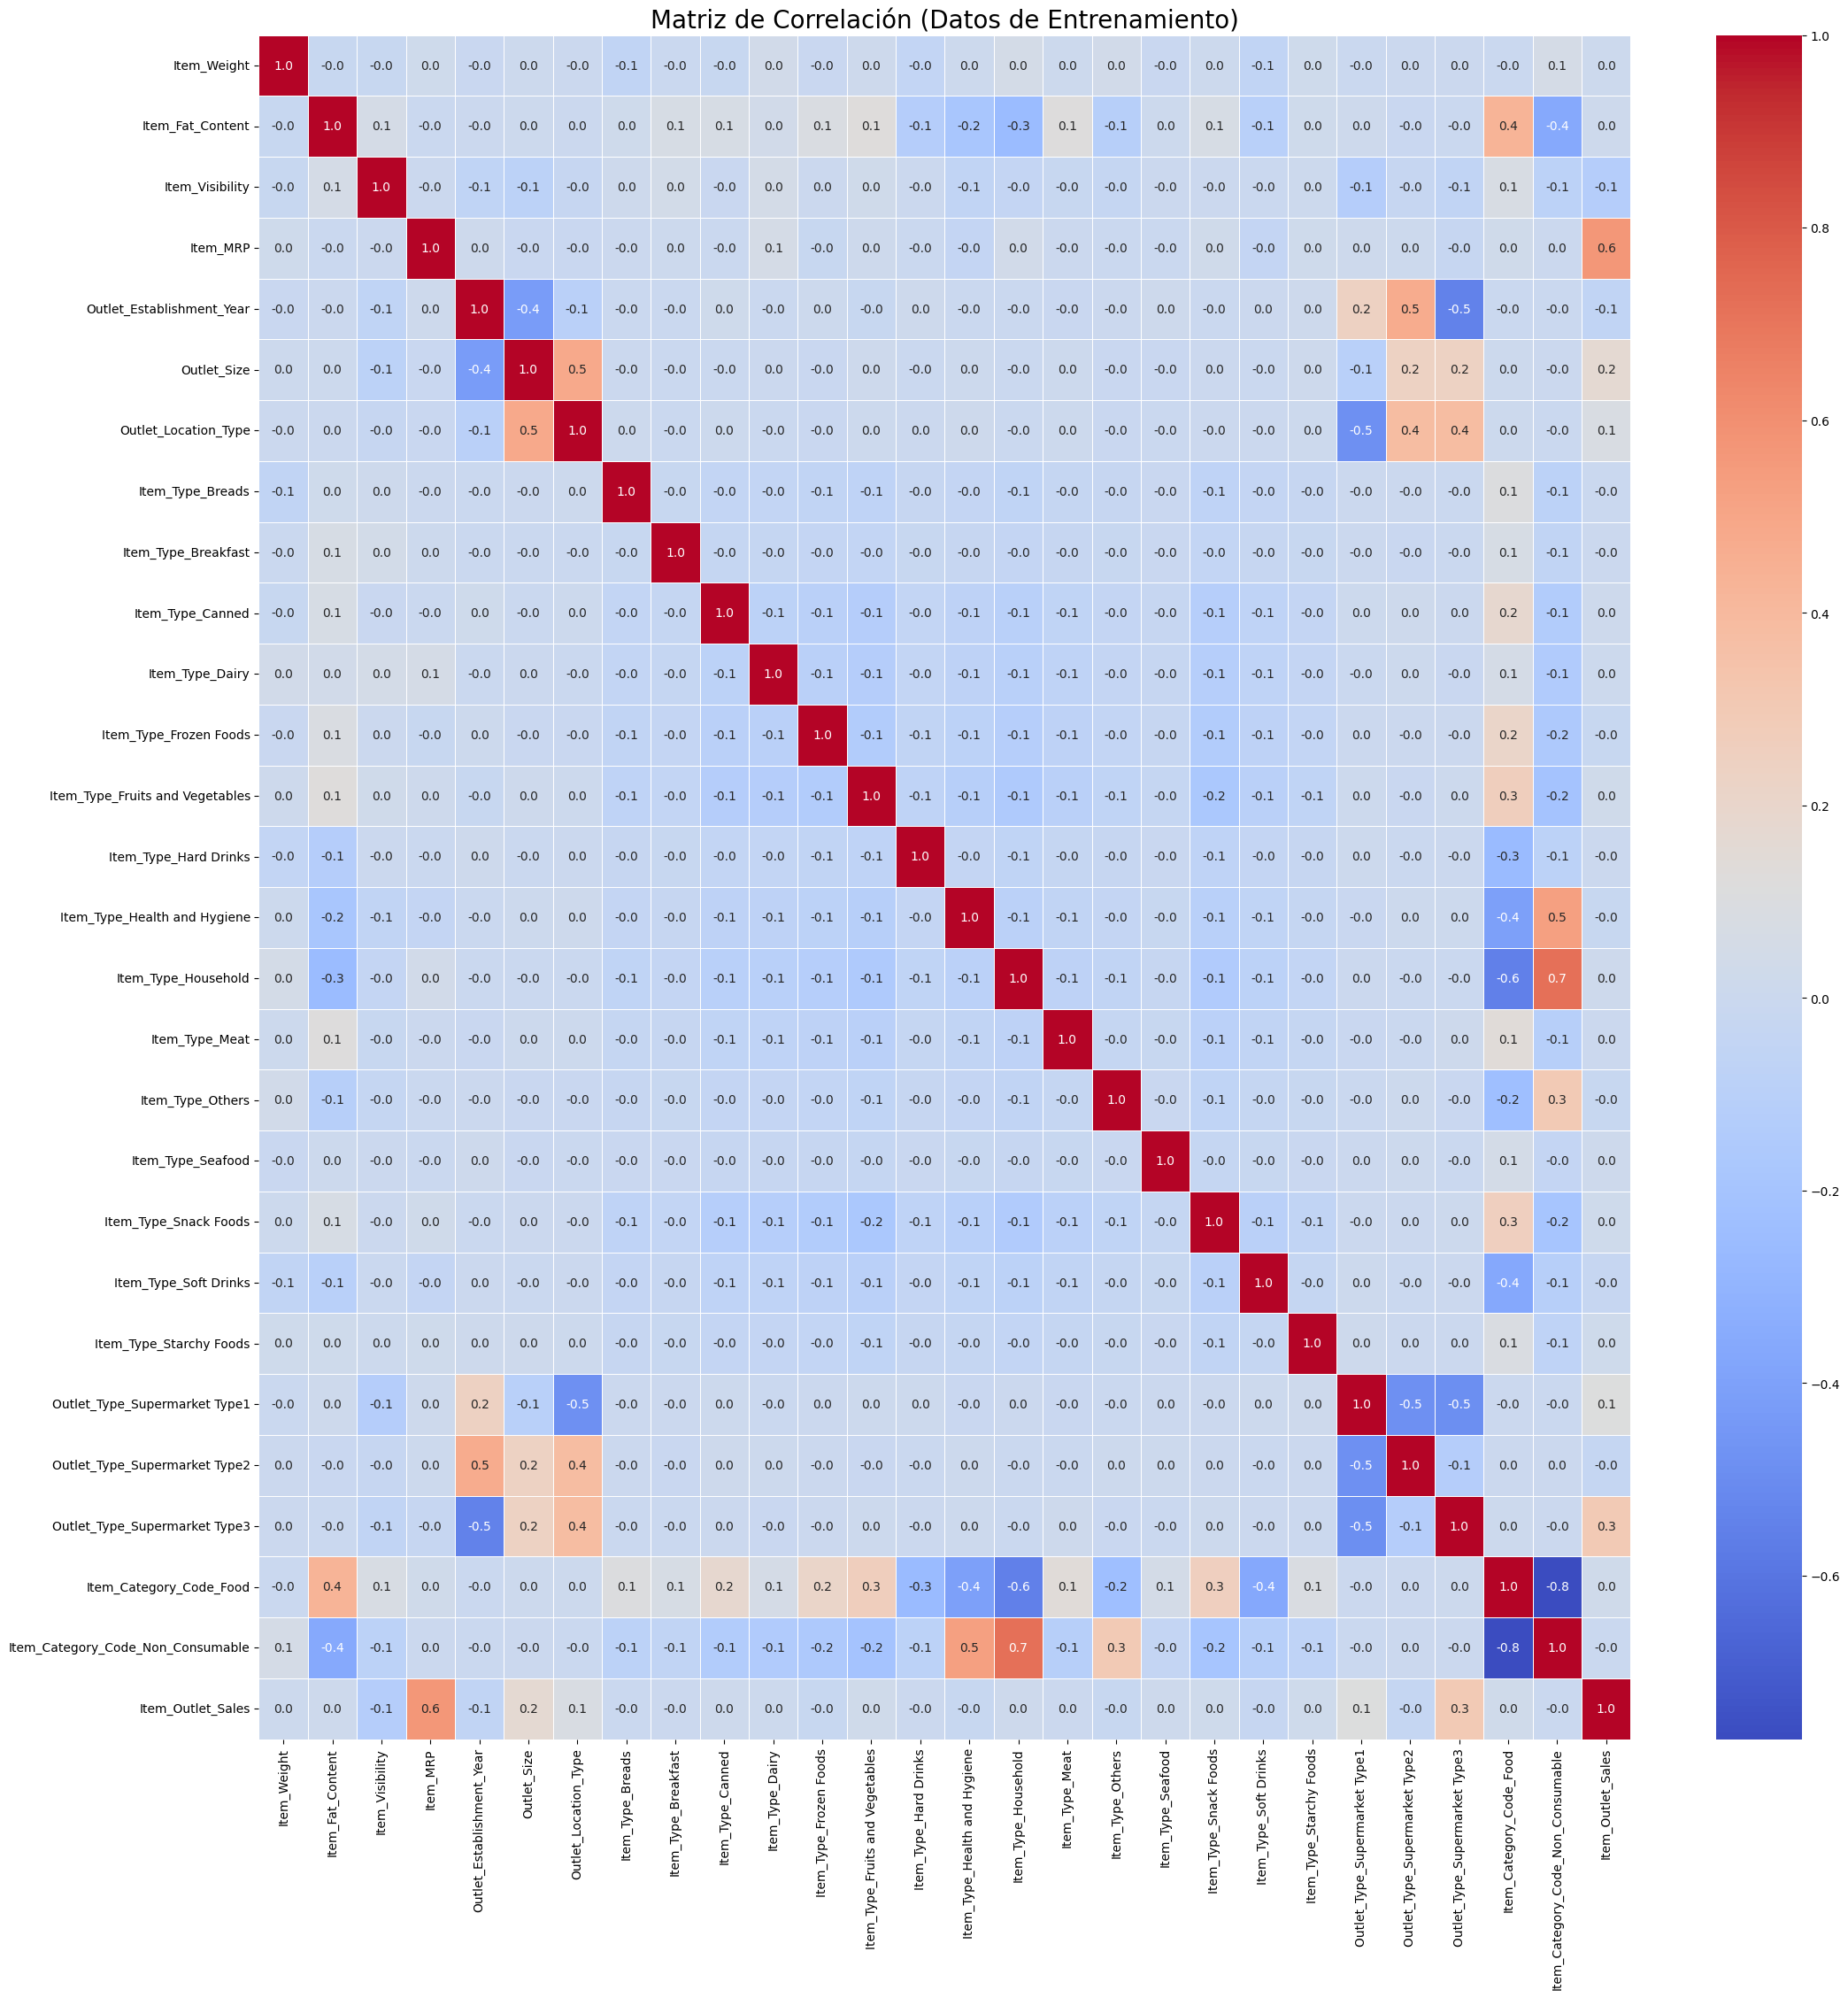

In [45]:
train_dataset = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)

# Calculamos la matriz
corr = train_dataset.corr()

# Graficamos
fig, ax = plt.subplots(figsize=(25, 25)) 

sns.heatmap(corr, 
            annot=True, 
            fmt=".1f",
            cmap="coolwarm", 
            linewidths=0.5, 
            ax=ax)

plt.title("Matriz de Correlación (Datos de Entrenamiento)", fontsize=20)
plt.show()

[Regresar a la Tabla de Contenido](#id0)

<div id = "id27" > </div>

### *7.6 Balanceo de datos*
[Balanceamos la variable target para modelamiento.]

Observamos que la variable Item_Outlet_Sales presenta una distribución asimétrica (sesgada a la derecha): existen muchas ventas de bajo valor y muy pocas de alto valor. Para mejorar el rendimiento del modelo de regresión, aplicamos una Transformación Logarítmica (np.log1p), lo que permite normalizar la distribución de los datos.

**Importante**

Al momento de hacer predicciones con el modelo, el resultado que devuelva no sería el resultado final, ya que estos resultados  estarán en escala logarítmica, no en el valor monetario real.

Para interpretar los resultados finales, es obligatorio aplicar la operación inversa (Exponencial) a las predicciones.

Transformación: np.log1p (Logaritmo)

Inversa: np.expm1 (Exponencial)

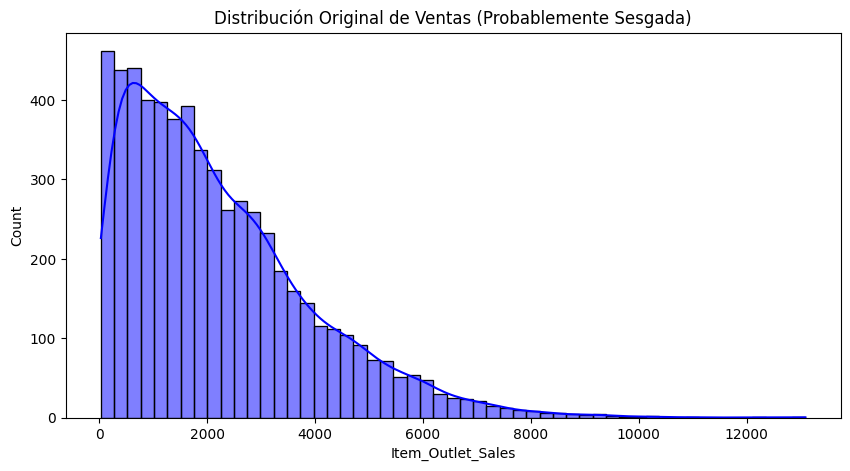

In [46]:
# Usamos y_train original (sin escalar)
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, color='blue')
plt.title("Distribución Original de Ventas (Probablemente Sesgada)")
plt.show()

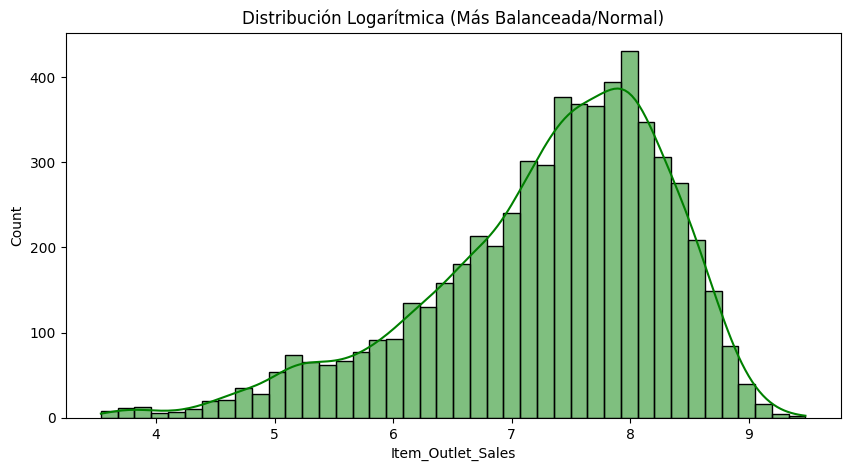

In [47]:
# Aplicamos Logaritmo a la variable objetivo
y_train_log = np.log1p(y_train)

y_test_log = np.log1p(y_test)

plt.figure(figsize=(10, 5))
sns.histplot(y_train_log, kde=True, color='green')
plt.title("Distribución Logarítmica (Más Balanceada/Normal)")
plt.show()

<div id = "id28" > </div>

## *8 Entrenamiento y evaluación de modelo*

Vamos a realizar el entrenamiento con 3 modelos, Regresión Lineal, Regresión Ridge y KNN, despues los evaluaremos usando RMSE y R2

<div id = "id29" > </div>

### *8.1 Evaluación y Comparativa Final*


In [48]:
def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    pred_log = modelo.predict(X_test)
    
    # Transformación inversa (Log -> Real)
    pred_real = np.expm1(pred_log)
    y_test_real = np.expm1(y_test)
    
    mse = mean_squared_error(y_test_real, pred_real)
    rmse = np.sqrt(mean_squared_error(y_test_real, pred_real))
    r2 = r2_score(y_test_real, pred_real)
    mae = mean_absolute_error(y_test_real, pred_real)
    
    print(f"--- {nombre} ---")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.4f}\n")
    return {"Modelo": nombre, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "Obj_Modelo": modelo}

In [49]:
resultados = []

# 1. Regresión Lineal (Simple)
model_lr = LinearRegression()
resultados.append(evaluar_modelo("Regresión Lineal", model_lr, X_train_scaled, y_train_log, X_test_scaled, y_test_log))

# 2. Regresión Ridge (Lineal con Regularización L2)
# alpha=1.0 es el estándar, luego lo optimizaremos
model_ridge = Ridge(alpha=1.0, random_state=42)
resultados.append(evaluar_modelo("Ridge Regression", model_ridge, X_train_scaled, y_train_log, X_test_scaled, y_test_log))

# 3. KNN (Vecinos más cercanos)
# n_neighbors=5 es el estándar
model_knn = KNeighborsRegressor(n_neighbors=5)
resultados.append(evaluar_modelo("KNN Regressor", model_knn, X_train_scaled, y_train_log, X_test_scaled, y_test_log))

# Comparativa
df_resultados = pd.DataFrame(resultados).drop("Obj_Modelo", axis=1)
print("\n=== COMPARATIVA FINAL ===")
print(df_resultados.sort_values(by="RMSE"))

--- Regresión Lineal ---
MSE: 1268175.53
RMSE: 1126.13
MAE: 771.78
R2: 0.5472

--- Ridge Regression ---
MSE: 1267019.87
RMSE: 1125.62
MAE: 771.70
R2: 0.5477

--- KNN Regressor ---
MSE: 1541578.67
RMSE: 1241.60
MAE: 859.32
R2: 0.4496


=== COMPARATIVA FINAL ===
             Modelo           MSE         RMSE         MAE        R2
1  Ridge Regression  1.267020e+06  1125.619771  771.695981  0.547653
0  Regresión Lineal  1.268176e+06  1126.132999  771.782194  0.547241
2     KNN Regressor  1.541579e+06  1241.603266  859.316353  0.449631


En este caso, el modelo con mejores valores en cuanto a MSE, RMSE, MAE (Mas cercanos a 0 posible) y R2 (Mas cercano a 1 posible) es el modelo de Ridge Regression, por lo que se continua con este modelo.

<div id = "id30" > </div>

### *8.2 Pruebas de optimización*

Vamos a realizar la optimización con GridSearchCV con validación cruzada para intentar hallar el mejor Alpha para Ridge

In [50]:


# Definimos la "rejilla" de valores que queremos probar, probamos desde valores muy pequeños hasta muy grandes
param_grid = {
    'alpha': [0.01, 0.1, 1, 5, 10, 20, 50, 100, 200]
}

print("Iniciando búsqueda del mejor hiperparámetro para Ridge...")

# Configuramos el Grid Search
# cv=5: Divide los datos de train en 5 partes para validar (validación cruzada)
# scoring='neg_mean_squared_error': Busca minimizar el error
grid_search = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Entrenamos (Usamos X_train_scaled y y_train_log)
grid_search.fit(X_train_scaled, y_train_log)

# RESULTADOS
print(f"\nMejor valor de alpha encontrado: {grid_search.best_params_['alpha']}")
print(f"Mejor score (MSE negativo) en validación: {grid_search.best_score_:.4f}")

# Extraemos el modelo ganador
mejor_modelo_ridge = grid_search.best_estimator_

# Lo evaluamos finalmente en el Test Set
print("\nEvaluación Final del Modelo Optimizado")
evaluar_modelo("Ridge Optimizado (Final)", mejor_modelo_ridge, X_train_scaled, y_train_log, X_test_scaled, y_test_log)

Iniciando búsqueda del mejor hiperparámetro para Ridge...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Mejor valor de alpha encontrado: 1
Mejor score (MSE negativo) en validación: -0.2915

Evaluación Final del Modelo Optimizado
--- Ridge Optimizado (Final) ---
MSE: 1267019.87
RMSE: 1125.62
MAE: 771.70
R2: 0.5477



{'Modelo': 'Ridge Optimizado (Final)',
 'MSE': 1267019.8694735428,
 'RMSE': np.float64(1125.6197712698292),
 'MAE': 771.6959809058229,
 'R2': 0.5476534104428692,
 'Obj_Modelo': Ridge(alpha=1, random_state=42)}

<div id = "id31" > </div>

### *8.3 Comparación entre valores predichos y valores reales usando Ridge*


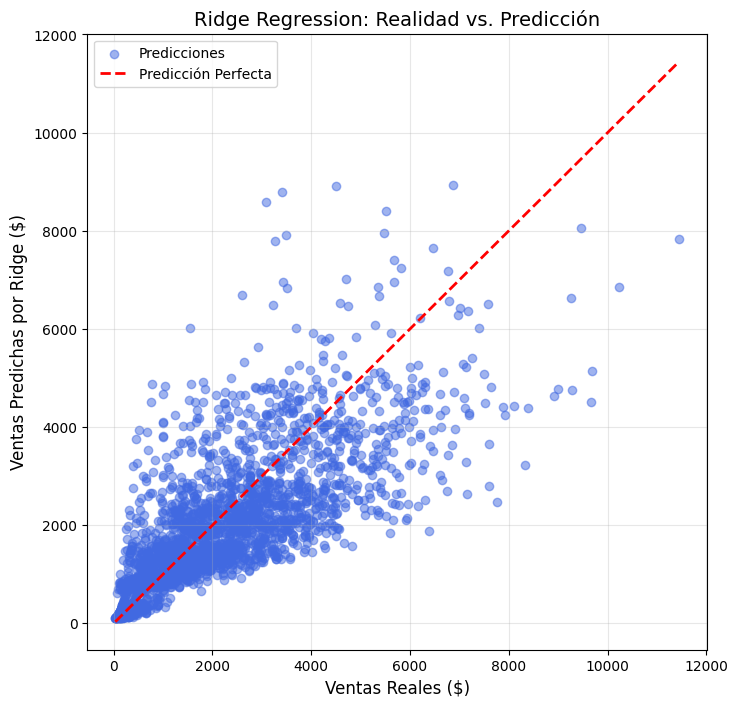

In [51]:
# Usamos el modelo optimizado y los datos escalados
y_pred_log = mejor_modelo_ridge.predict(X_test_scaled)

# Hacemos la inversa del logaritmo para obtener valores en dinero real
y_test_real = np.expm1(y_test_log)
y_pred_real = np.expm1(y_pred_log)

plt.figure(figsize=(8, 8))
plt.scatter(y_test_real, y_pred_real, alpha=0.5, color='royalblue', label='Predicciones')

# Calculamos el mínimo y máximo para trazar una línea diagonal perfecta
min_val = min(y_test_real.min(), y_pred_real.min())
max_val = max(y_test_real.max(), y_pred_real.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')

plt.xlabel("Ventas Reales ($)", fontsize=12)
plt.ylabel("Ventas Predichas por Ridge ($)", fontsize=12)
plt.title("Ridge Regression: Realidad vs. Predicción", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

<div id = "id32" > </div>

## 9. Conclusión Final del modelo

Tras completar el ciclo de vida del proyecto de ciencia de datos (EDA, Limpieza, Ingeniería de Características y Modelado), se ha seleccionado el modelo Ridge Regression Optimizado como la herramienta predictiva para BigMart. A continuación, se detallan las conclusiones sobre su desempeño y aplicabilidad:
1. Desempeño del Modelo ($R^2 \approx 0.55$)
El modelo ha logrado explicar aproximadamente el 55% de la variabilidad en las ventas de los productos. Esto significa que el modelo ha capturado exitosamente los patrones estructurales disponibles en los datos (impacto del tipo de tienda, precio del producto, visibilidad, etc.). El 44% Restante: El porcentaje de varianza no explicada se atribuye a la naturaleza estocástica del comportamiento humano y a variables exógenas no presentes en este dataset, tales como: campañas de marketing activas, estacionalidad (Navidad, vacaciones), tráfico diario de clientes, acciones de la competencia o factores macroeconómicos.

2. Precisión y Expectativas de Predicción
Es fundamental comprender que este modelo no es una herramienta de contabilidad exacta, sino una herramienta de estimación estratégica. Debido a la dispersión observada y al margen de error (RMSE), las predicciones no deben interpretarse como valores monetarios exactos al centavo, sino como estimaciones de potencial de venta.
El modelo es altamente confiable para distinguir entre productos de alta rotación (que requieren mucho stock) y productos de baja rotación (que requieren stock mínimo).

3. Impacto en el Negocio (Solución al Caso de Estudio)
El objetivo principal era resolver el problema de "Sobre Stock" y optimizar el inventario para el Q1-2021. El modelo cumple este objetivo al permitir a la empresa anticipar la demanda según las características de cada tienda.
Se sugiere utilizar las predicciones para clasificar los envíos en bandas (ej. "Inventario Alto", "Medio", "Bajo") en lugar de buscar una cifra exacta, minimizando así el riesgo de que los productos se queden estancados en almacén.

4. Recomendaciones Futuras
Para elevar la precisión del modelo por encima del 0.60 o 0.70 en futuras iteraciones, se recomienda enriquecer la base de datos con información temporal (fechas de venta) y datos operativos (promociones vigentes, días festivos), variables que el modelo actual desconoce pero que influyen drásticamente en la decisión de compra.

In [52]:
import joblib

In [53]:
# 1. Guardar el Modelo (Ridge Optimizado)
joblib.dump(mejor_modelo_ridge, 'modelo_ridge.pkl')

# 2. Guardar el Escalador (MinMax)
joblib.dump(scale, 'escalador.pkl')

# 3. Guardar las Columnas exactas del entrenamiento
# Esto es vital para que el One-Hot Encoding coincida
columnas_entrenamiento = X_train_scaled.columns.tolist()
joblib.dump(columnas_entrenamiento, 'columnas_modelo.pkl')

print("Archivos .pkl guardados.")

Archivos .pkl guardados.


[Regresar a la Tabla de Contenido](#id0)